# Logistics Regression



Logistics Regression is one of the classification algorithm that is built over the  analogy of regression model.

$Logistics \ Regression = Linear \ Regression + Sigmoid \ Activation$

In *Binary Classification*,

  $y$ $\epsilon$ ${0,1}$ **where** `0 : "Positive Class"` `1 : "Negative Class"`


    

In Linear Regression, the hypothesis was

$y = b + wx$

**where,**

x = feature matrix

y = target vector

b = bias vector

w  = weight matrix


**Now Lets deep dive into some maths behind logistics regression**

Linear Regression hypothesis is given by

$z = \theta^{T}X $

**where**,

$\theta = Vector \ of \ Bias \ and \ Weight$

$\theta[0] = Bias$

$\theta[1 - n\_features] = Weights $

$X[0] = 1$,

$X[ 1 - n\_features] = Feature \ Matrix $

Previously In Linear Regression We Learnt was `y = b + wx  `


The Sigmoid Function is given by

$g(z) = \frac{1}{1+e^{-z}} $

where, $g(z)$ is the probability between 0 & 1.

The probability $g(z)$ is also known as  Logisitics Function. It maps any real number to the (0,1) interval.  The logistic function has asymptotes at 0 and 1, and it crosses the y-axis at 0.5.

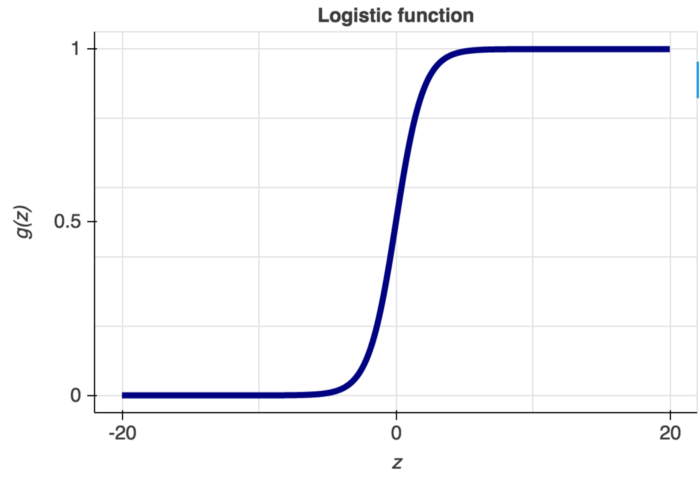

**Credit** [Logistics Regression](https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a)



Logistics Regression hypothesis is given by

$h_\theta(x) = g(\theta^Tx)  = \frac {1} {1 + e^{-\theta^{T}X}}$

This is known as hypothesis function. This returns us a probability between 0 & 1.





**Interpretation of Hypothesis Output**

So, Lets Say we have two cases of Breast Cancer Detection.

i.e. Benign(y=0) or Malignant(y=1)

$h_\theta(x) $ = *Estimated Probability that y=1 on input X*

Example: -

If $h_\theta(x) = 0.8 $ , We can say that there is 80% chance that tumor is malignant. **OR**  We can say that there is 20% chance that tumor is benign. But We won't say that since we are here to classify. Since, 80% > 20%, We predict for those given features having hypothesis output 80%, "*the patient has breast Cancer*"


**Decision Boundary**

From above example you can see, 80% chances of y=1 class results in y=1 prediction.

Normally,

We predict that $y=1$ if $h_\theta(x) \geqslant 0.5 \ or \ z \geqslant 0 \ whenever \  \theta^{T}x \geqslant 0 $

We predict that $y=0$ if $h_\theta(x) < 0.5 \ or \ z < 0 \ whenever  \  \theta^{T}x < 0$

Our main task is to find the optimized set of weights i.e $Values \ of \ \theta$
So, The question does arises.

**How to optimize $\theta$ ?**

**Firstly**, We need to find the Cost Function of Logistics Regression.

Sadly, We can't use the cost function of linear regression since we can't get a convex curve in which our optimization algorithm works due to use of our sigmoid function which is not a linear function. We can get stuck in local minima and can't do much. So, We will need a convex (Bowl Like Curve) shape to work smoothly and need to use another cost Function for Logistics Regression.


In Linear Regression ,

$J(\theta) = \frac{1}{m}  \sum_{i=1}^{m} Cost[h_\theta(x),y] $

where, $Cost[h_\theta(x),y] = \frac{1}{2}[h_\theta(x)-y]^2 $   

In Logistics Regression,


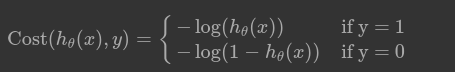

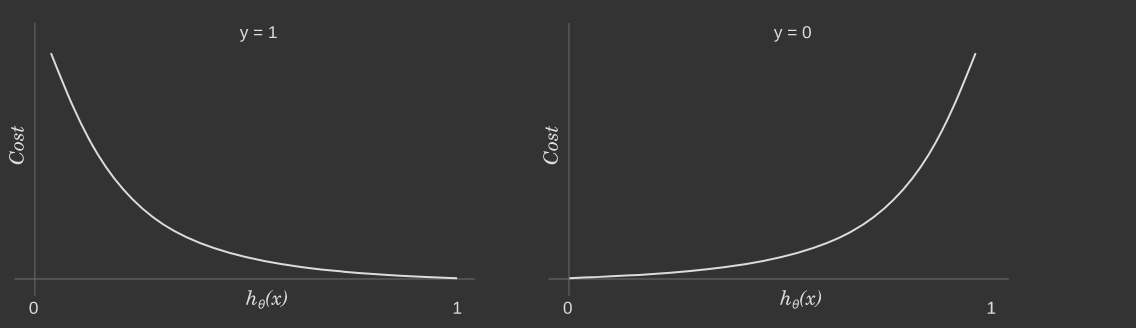

Credit: [Logistics Regression Cost Function](https://www.internalpointers.com/post/cost-function-logistic-regression)

**CASE** $y= 1,$ (Positive)

  $Cost \longrightarrow 0 \ if, \ h_θ(x) \Longrightarrow 1 $

  $Cost \longrightarrow \infty \ if, \ h_θ(x) \Longrightarrow 0 $

**CASE** $y= 0,$ (Negative)

  $Cost \longrightarrow 0 \ if, \ h_θ(x) \Longrightarrow 0 $

  $Cost \longrightarrow \infty \ if, \ h_θ(x) \Longrightarrow 1 $

**The intuition is that larger mistakes should get larger penalties**

Combining Both Equations,We can write

$Cost(h_θ(x),y)=−ylog(h_θ(x))−(1−y)log(1−h_θ(x))$







And , The Cost Function can be written as :

$J(θ)= - \frac{1}{m} [ \sum_{i=1}^{m} ylog(h_θ(x))+(1−y)log(1−h_θ(x))]$


Then as we know, We are here to reduce the cost to the global minima as possible. The optimization algorithm that we will be using is Gradient Descent i.e to find the best values of θ.

In simple words, We want to minimize the cost function using Gradient Descent in each epochs.}

 $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \underset{\theta}{Min} \ J(\theta)$

Gradient Descent Algorithm is given by:



$repeat \ until \ convergence \ \{ $

$θ_j := θ_j - \alpha \frac{\partial }{\partial θ_j} J(θ) $

$\}$


  

Gradient is given by

$\frac{\partial }{\partial θ_j} J(θ) =\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x) - y)x_j$

Vectorized Implementation of Gradient Descent will be



$θ := θ - \frac{\alpha}{m} X^T(g(X\theta) - y)  $

But We don't really run our algorithm till convergence but run it to a certain number of epochs and see if our model got converged or not by looking into the plot of cost vs epoch.

### ASSIGNMENT
**TO IMPLEMENT LOGISTICS REGRESSION ALGORITHM BY ONESELF**

[Refer here for help but no copy](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)

# BREAST CANCER DETECTION USING LOGISTICS REGRESSION

In [1]:
#Importing all the basic necessities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Datasets
from sklearn.datasets import load_breast_cancer

#Importing Helper Functions (although we are not using it today :( )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#Importing our today's model
from sklearn.linear_model import LogisticRegression

#Importing Performance Metrics
from sklearn.metrics import confusion_matrix, accuracy_score , f1_score

In [2]:
#Loading our datasets
dataset = load_breast_cancer()
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Since we have loaded the dataset into dataset dictionary. We need to view the dataset content. Primarily,

Data gives features matrix.

Target gives target vector.

target_names is list of target classes.

DESCR gives full description of dataset.

feature_names is array of features names or column names.



In [8]:
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
#Saving our features matrix and target vector respectively
X = dataset['data']
y = dataset['target']
column_names = dataset['feature_names']
target_class = dataset['target_names']

In [11]:
#Knowing about target classes and features names
print(column_names)
print('\n')
print(target_class)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


['malignant' 'benign']


**Hence FYI**

Malingnant = 1 [If the cells are  cancerous, the tumor is malingnant]

Benign = 0 [If the cells are not cancerous, the tumor is benign]

In [13]:
#Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.8)


In [14]:
#Fitting into model
classifier = LogisticRegression(max_iter=2500)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=2500)

In [16]:
#Prediciting With our model
y_pred = classifier.predict(x_test)

cn=confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print('Confusion Matrix is ',cn)
print('Accuracy is ',acc)
print('F1 Score is ',f1_score)

Confusion Matrix is  [[40  4]
 [ 2 68]]
Accuracy is  0.9473684210526315
F1 Score is  0.9577464788732395


# Titainic Dataset Analysis

In [ ]:
#Titanic Dataset Analysis
titanic = pd.read_csv('train.csv')
titanic.head()

In [ ]:
#Shape of data
titanic.shape

(891, 12)

In [ ]:
#Basic Statistical Description
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Checking null values in dataset per column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Checking data types of all the features
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Checking frequency count of survivors(1) and non-survivors(0)
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Analyzing survival distribution with respect to other features**

1. Gender

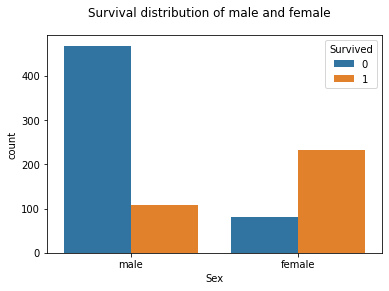

In [ ]:
# Plotting the number of survivors and non-survivors according to gender
fig = plt.figure()
sns.countplot(data=titanic, x ='Sex', hue='Survived' )
fig.suptitle('Survival distribution of male and female')
plt.show()

2. Passenger Class

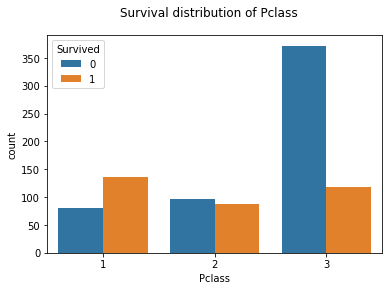

In [ ]:
# Plotting the number of survivors and non-survivors according to Pclass
fig = plt.figure()
sns.countplot(data= titanic, x = 'Pclass', hue='Survived')
fig.suptitle('Survival distribution of Pclass')
plt.show()